# Loading data

In [1]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [2]:
import pandas as pd
wp = pd.read_csv('../weighted_phonemes.csv', encoding="utf-8")
wp.drop('Unnamed: 0', inplace=True, axis=1)
wp

,VERSE1,VERSE2,PROSODY,PROSODY_ID,VERSE1_phoneme,VERSE2_phoneme,PROSODY_phoneme
0,‏ آتش آهم ز بس گلزار بی نم می شود,برگ گل سنگ ته دندان شبنم می شود,فاعلاتن فاعلاتن فاعلاتن فاعلن,12,‏ ātaš āham ze bas golzār bi nam mišavad,barg gol sang tah dandān šabnam mišavad,fā`elānt fā`elānt fā`elānt fā`elan
1,‏ بهیچوجه نیارم برید ازو که مرا,به دل محبت او چون صفاست با گوهر,مفاعلن فعلاتن مفاعلن فعلن,92,‏ bahyxube nayāram barid ozav ke marā,be del mohbat u čon sefāsat bā gohar,mafā`elen fal`ānt mafā`elen fe`lan
2,‏ بی تکلف ز شکر ریزی صائب جویا,طوطی نطق تو طرز سخن آموخته است,فعلاتن فعلاتن فعلاتن فعلن,45,‏ bi taklef ze šekar rizi sā`eb juyā,tuti notq to tarz soxan āmustened,fal`ānt fal`ānt fal`ānt fe`lan
3,‏ چنان کز شهد و شکر نقل نوشین می‌شود پیدا,چو لب بر لب گذاری جان شیرین می‌شود پیدا,مفاعیلن مفاعیلن مفاعیلن مفاعیلن,114,‏ čenān kez šahd va šekar naql nušin mišavad p...,čo lab bar lab gozāri jān širin mišavad peydā,mafā`eliyān mafā`eliyān mafā`eliyān mafā`eliyān
4,‏ خواهم که خدا روی به دولت بگشاید,زین درگه امید عرب را و عجم را,مفعول مفاعیل مفاعیل فعولن,163,‏ xāhomeko xodā ravi be dolat begošāyad,yzn dargah omid arab rā va ajam rā,maf`ul mafā`e`il mafā`e`il fe`olan
...,...,...,...,...,...,...,...
1339684,ییشش بخوانده ‌غاصب کالیسی‌‌,مستد برانه آیت ولّو را‌,مفعول فاعلات مفاعیلن,143,yeš`ege bexānde qa`asb kālisi,mostad berāne āyat velv rā`,maf`ul fā`elāt mafā`eliyān
1339685,ییش‌هر تختی یکی خوان ظریف,وندر آن گسترده دیبایی لطیف,فاعلاتن فاعلاتن فاعلن,16,ye^lang taxti ye^ki xān zarif,venedr ān gostarde dibā`i latif,fā`elānt fā`elānt fā`elan
1339686,ییشوایان بهر فردا گرم شور,هریکی گوبا به دیگرگونه طور,فاعلاتن فاعلاتن فاعلن,16,yejviyān ba^hre fardā garm šur,haryeki govā be digargune tor,fā`elānt fā`elānt fā`elan
1339687,ییک باره‌ای برنشسته سمند,بفتراک بربسته دارد کمند,فعولن فعولن فعولن فعل,54,yezak hāre`e barnešaste samand,beftārt barbaste dārad kamand,fe`olan fe`olan fe`olan fe`l


# **Balance Sample**  
2000 records  from each 55 popular prosodies.

In [3]:
id_counts = wp.groupby('PROSODY_ID').size()
filtered_ids = id_counts[id_counts >= 100]
result = wp[wp['PROSODY_ID'].isin(filtered_ids.index)]

def select_random_rows(group):
    n = min(100, len(group))
    return group.sample(n=n)
bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)
numberclass = len(set(bsmp["PROSODY_ID"]))
numberclass

C:\Users\Turbo\AppData\Local\Temp\ipykernel_13212\3966078360.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)


55

shuffling

In [4]:
from random import shuffle

row_indices = bsmp.index.tolist()
shuffle(row_indices)
bsmp = bsmp.iloc[row_indices]
bsmp = bsmp.reset_index(drop=True)
bsmp

,VERSE1,VERSE2,PROSODY,PROSODY_ID,VERSE1_phoneme,VERSE2_phoneme,PROSODY_phoneme
0,نه قتیل تیغ جفا پدر,ننهی چرا قدس به سرم,متفاعلن متفاعلن متفاعلن متفاعلن,68,noh qatil tiq jafā pedar,nanehi čarā qods be soram,motefā`elan motefā`elan motefā`elan motefā`elan
1,ور جان ببری از دست غمش,از مرده خری، والله بتری,مستفعلتن مستفعلتن,70,var jān bebari az dast qamš,az morde xari ، vālele betari,mostaf`altan mostaf`altan
2,دارد به جز نبی بر ماسوا سبق,جوید عطارد از بهر ثناش رق,مفعول فاعلن مفعول فاعلن,151,dārad be joz nabi bar māsavā sabeq,juyad atārod az ba^hre sonāš raq,maf`ul fā`elan maf`ul fā`elan
3,چه ذوق دارند این چار اصل ز آمیزش,نبات و مردم و حیوان نتیجه این چار,مفاعلن فعلاتن مفاعلن فعلن,92,če zoq dārand in čār asl ze āmizeš,nabāt va mordam va heyvān natije in čār,mafā`elen fal`ānt mafā`elen fe`lan
4,همچو شهیدان تنش به خاک نپوسد,هر که به تیغ غم تو یافت شهادت,مفتعلن فاعلات مفتعلن فع,117,ha^mčo šahidān taneš be xāk napusad,har ke be tiq qam to yāft šahādat,meftal`on fā`elāt meftal`on fa`
...,...,...,...,...,...,...,...
5495,جهد آن کن که از این کان جهان جان را,برگذاری به خرد زین فلک گردان,فعلاتن فعلاتن فعلاتن فع,43,jahad ān kan ke az in kān jahān jān rā,bargozāri be xerad yzn falak gardān,fal`ānt fal`ānt fal`ānt fa`
5496,رشته مهرش دهد پیوند کالای روان,خود جدا از یکدگر، گر پود و تار آمد مرا,فاعلاتن فاعلاتن فاعلاتن فاعلن,12,rešte mehrešegi dahad peyvand kālāye ravān,xud jodā az yekdgar ، gar pud va tār āmad marā,fā`elānt fā`elānt fā`elānt fā`elan
5497,ای سال و ماه پیشهٔ تو رادی,در هر دلی ز رادی تو شادی,مفعول فاعلات مفاعیلن,143,ey sāl va māh pišod to rādi,dar har dali ze rādi to šādi,maf`ul fā`elāt mafā`eliyān
5498,روزم از شب تیره تر است,ای خود شب ما را روز بیا,متفاعلتن متفاعلتن,63,ruzam az šab teyreter ast,ey xud šab mā rā ruz biyā,motefā`eltan motefā`eltan


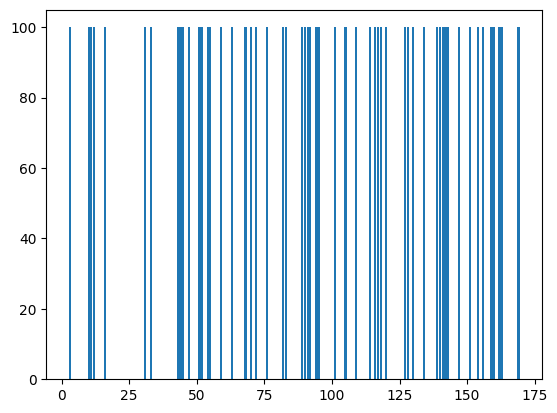

5500

In [5]:
import matplotlib.pyplot as plt

id_counts = bsmp['PROSODY_ID'].value_counts()
id_counts_sorted = id_counts.sort_index()

plt.bar(id_counts_sorted.index, id_counts_sorted)
plt.show()
records = len(bsmp)
records

## Splitting data to train,validation,test

In [6]:
verse1 = list(bsmp["VERSE1_phoneme"])
verse2 = list(bsmp["VERSE2_phoneme"])
verse = verse1 + verse2
prosody = list(bsmp["PROSODY_phoneme"]) + list(bsmp["PROSODY_phoneme"])
len(verse),len(prosody)

(11000, 11000)

In [7]:
all_data=[]
for i in range(len(verse)):
  all_data.append((verse[i],prosody[i]))

In [8]:
len(all_data),all_data[500]

(11000, ('lājaram rext begu` andar bonhāšd', 'fal`ānt fal`ānt fal`ānt fa`'))

In [9]:
from sklearn.model_selection import train_test_split
train_iter,test_iter=train_test_split(all_data,test_size=0.2,random_state=42,shuffle=True)

In [10]:
len(train_iter),len(test_iter)

(8800, 2200)

# Tokenizer:
Since both graphemes and phonemes have no space character we just list the string for tokenizer

In [11]:
def my_tokenizer(word: str):
    return word.split(" ")

# Building vocab and token transform

In [12]:
from torchtext.vocab import build_vocab_from_iterator
from typing import Iterable, List

token_transform = {}
vocab_transform = {}

SRC_LANGUAGE = 'verse'
TGT_LANGUAGE = 'prosody'

token_transform[SRC_LANGUAGE] = my_tokenizer
token_transform[TGT_LANGUAGE] = my_tokenizer

# yield token for build_vocab_from_iterator function
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

#special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator
    all_iter=all_data
    # Create torchtext's Vocab object
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(all_data, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

# Creating Transformer Model

In [13]:
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

## PositionalEncoding

In [14]:
# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])


## TokenEmbedding

In [15]:
# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)


## Seq2Seq Transformer model

In [16]:
# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

# Masking mechanism
During training, we need a subsequent character mask that will prevent model to look into the future characters when making predictions. We will also need masks to hide source and target padding tokens. Below, let’s define a function that will take care of both.

Reference : https://pytorch.org/tutorials/beginner/translation_transformer.html

In [17]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

# Building Model

In [18]:
torch.manual_seed(42)

# Hyperparameters
SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 5
NUM_DECODER_LAYERS = 5

weight_decay = float(0)
lr = 1e-5

# Instantiating Model
g2p_s2s_model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

# weights and biases initialization
for p in g2p_s2s_model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

g2p_s2s_model = g2p_s2s_model.to(DEVICE)

# CrossEntropy Loss function
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

# AdamW optimizer
optimizer = torch.optim.AdamW(g2p_s2s_model.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9)

C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [19]:
!pip install transformers

# Collation
our data iterator yields a pair of raw strings. We need to convert these string pairs into the batched tensors that can be processed by our Seq2Seq network defined previously. Below we define our collate function that convert batch of raw strings into batch tensors that can be fed directly into our model.

Reference : https://pytorch.org/tutorials/beginner/translation_transformer.html

In [20]:
from torch.nn.utils.rnn import pad_sequence

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# src and tgt language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tesors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

# Training

In [21]:
from torch.utils.data import DataLoader

## Training function

In [22]:

def train_function(model, optimizer):
    model.train()
    losses = 0
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in train_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()

        losses += loss.item()

    return losses / len(train_dataloader)

## Evaluating function

In [23]:
def evaluate_function(model):
    model.eval()
    losses = 0

    val_iter=test_iter
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(val_dataloader)

## Train model for N epochs

In [24]:
from timeit import default_timer as timer
epoch_times = []
NUM_EPOCHS = 20

stats_for_plotting={"train_losses":[],"test_losses":[]}
for epoch in range(NUM_EPOCHS):
    start_time = timer()
    train_loss = train_function(g2p_s2s_model, optimizer)
    end_time = timer()
    val_loss = evaluate_function(g2p_s2s_model)
    et = end_time - start_time
    epoch_times.append(et)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {et:.3f}s"))
    stats_for_plotting["train_losses"].append(train_loss)
    stats_for_plotting["test_losses"].append(val_loss)
torch.save(g2p_s2s_model.state_dict(), f"g2p_s2s-{records}-{NUM_EPOCHS}e.pth")

C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Epoch: 0, Train loss: 2.595, Val loss: 1.806, Epoch time = 3.989s
Epoch: 1, Train loss: 1.826, Val loss: 1.315, Epoch time = 2.508s
Epoch: 2, Train loss: 1.465, Val loss: 1.065, Epoch time = 2.522s
Epoch: 3, Train loss: 1.299, Val loss: 0.982, Epoch time = 2.435s
Epoch: 4, Train loss: 1.196, Val loss: 0.924, Epoch time = 2.445s
Epoch: 5, Train loss: 1.131, Val loss: 0.893, Epoch time = 2.447s
Epoch: 6, Train loss: 1.090, Val loss: 0.881, Epoch time = 2.461s
Epoch: 7, Train loss: 1.049, Val loss: 0.866, Epoch time = 2.402s
Epoch: 8, Train loss: 1.025, Val loss: 0.863, Epoch time = 2.410s
Epoch: 9, Train loss: 1.001, Val loss: 0.843, Epoch time = 2.398s
Epoch: 10, Train loss: 0.979, Val loss: 0.832, Epoch time = 2.388s
Epoch: 11, Train loss: 0.960, Val loss: 0.834, Epoch time = 2.398s
Epoch: 12, Train loss: 0.947, Val loss: 0.826, Epoch time = 2.409s
Epoch: 13, Train loss: 0.930, Val loss: 0.818, Epoch time = 2.402s
Epoch: 14, Train loss: 0.911, Val loss: 0.808, Epoch time = 2.432s
Epoch

## Plotting stats

In [25]:
from matplotlib import pyplot as plt

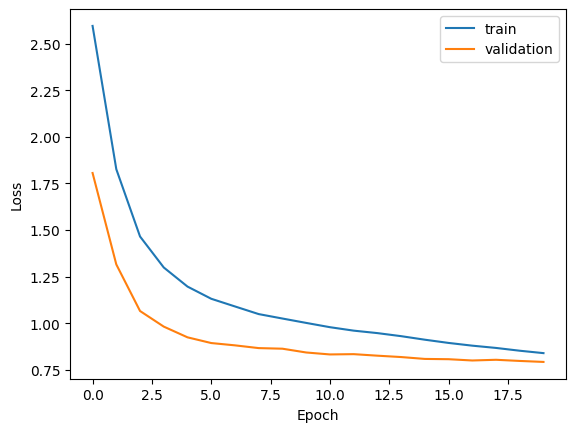

In [26]:
plt.plot(stats_for_plotting["train_losses"],label="train")
plt.plot(stats_for_plotting["test_losses"],label="validation")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [27]:
!pip install jiwer

# Inference

## decoder function
it is called greedy decoder because we don't do any beam search for results

In [28]:
# function to generate output sequence
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


## Inference function
gives a grapheme and outputs the phoneme

In [29]:
def inference(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

# Evaluating model last checkpoint

## 1.Saving all predictions

In [30]:
from tqdm import tqdm
all_preds=[]
for gs,ps in tqdm(test_iter):
  ground_truth=ps
  myoutput=inference(g2p_s2s_model,gs)
  all_preds.append(myoutput.replace(" ",""))

100%|██████████████████████████████████████████████████████████████████████████████| 2200/2200 [00:57<00:00, 38.06it/s]


## 2.Calculating WER and PER
WER : Word error rate

PER : Phoneme error rate

In [31]:
from jiwer import cer,wer

In [32]:
trues=0
all_num=0
average_cer=0
average_wer=0
for i in range(len(all_preds)):
  if all_preds[i]==test_iter[i][1].replace(" ",""):
    trues+=1
  all_num+=1
  average_cer+=cer(test_iter[i][1].replace(" ",""),all_preds[i])
  average_wer+=wer(test_iter[i][1].replace(" ",""),all_preds[i])
average_cer/=len(all_preds)
average_wer/=len(all_preds)
exact_accuracy=trues/all_num
print(f"Exact Accuracy : {exact_accuracy}")
print(f"PER : {average_cer}")
print(f"WER : {average_wer}")

Exact Accuracy : 0.06181818181818182
PER : 0.5553636168743189
WER : 0.9381818181818182


In [33]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
trues=0
all_num=0
average_cer=0
average_wer=0
for i in range(len(all_preds)):
  if all_preds[i]==test_iter[i][1].replace(" ",""):
    trues+=1
  all_num+=1
  average_cer+=cer(test_iter[i][1].replace(" ",""),all_preds[i])
  average_wer+=wer(test_iter[i][1].replace(" ",""),all_preds[i])
average_cer/=len(all_preds)
average_wer/=len(all_preds)
exact_accuracy=trues/all_num
print(f"Exact Accuracy : {exact_accuracy}")

true_labels = [data[1].replace(" ","") for data in test_iter]
pred_labels = all_preds

# Calculate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Calculate precision, recall, and f1-score
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f1 = f1_score(true_labels, pred_labels, average='macro')

# Print the results
print((f"Epoch: {epoch+1}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
print(f'train time = {sum(epoch_times)}')
print(f"Exact Accuracy : {exact_accuracy}")
print(f"PER : {average_cer}")
print(f"WER : {average_wer}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(cm)

Exact Accuracy : 0.06181818181818182
Epoch: 20, Train loss: 0.839, Val loss: 0.792, Epoch time = 2.438s
train time = 50.19568310014438
Exact Accuracy : 0.06181818181818182
PER : 0.5553636168743189
WER : 0.9381818181818182
F1 Score: 0.028116548813812474
Precision: 0.06132528869165816
Recall: 0.048879926716028935
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Some examples:




In [34]:
import random
some_example_df=pd.DataFrame(columns=['Verse Phoneme','Predicted Prosody Phoneme','Correct Prosody Phoneme'])
some_examples=random.sample(test_iter, 20)
example_gs=[]
example_gt_prosody=[]
example_pred_prosody=[]
for example in some_examples:
  example_gs.append(example[0])
  example_gt_prosody.append(example[1])
  example_pred_prosody.append(inference(g2p_s2s_model,example[0]))
some_example_df["Verse Phoneme"]=example_gs
some_example_df["Predicted Prosody Phoneme"]=example_pred_prosody
some_example_df["Correct Prosody Phoneme"]=example_gt_prosody
some_example_df

,Verse Phoneme,Predicted Prosody Phoneme,Correct Prosody Phoneme
0,čunmāhi az bigānegi har yek gorizān dideam,maf`ul fā`elāt mafā`e`il fā`elānt,meftal`on meftal`on fa` meftal`on meftal`on fa`
1,mimahr dar sāqar zar belarzad,maf`ul fā`elāt mafā`eliyān,fe`olan fe`olan fe`olan fe`olan
2,be aql nāzi hakim tā key be fekrat in rah nemi...,mafā`elen fa` mafā`elen fa` mafā`elen fa` maf...,mafā`elen fa` mafā`elen fa` mafā`elen fa` mafā...
3,kāštāns malāyek va ruh,maf`ul fā`elāt mafā`eliyān,mafā`elen fa` mafā`elen fa`
4,zir lab dādan došnām ke če,maf`ul mafā`e`il mafā`e`il fe`l,fal`ānt fal`ānt fe`lan
5,kučkadtand bar dam sarv rohi če xandad ؟,maf`ul fā`elāt mafā`e`il fā`elānt,maf`ul fā`elāt mafā`e`il fā`elānt
6,melk rā farbe kanad kalak nezārat,maf`ul fā`elāt mafā`e`il fa`,fā`elānt fā`elānt fā`elānt
7,bedešyān nabad yād timār va qam,maf`ul fā`elāt mafā`e`il fa`,fe`olan fe`olan fe`olan fe`l
8,xabar nadāram man az del xud,maf`ul fā`elāt mafā`eliyān,mafā`elen fa` mafā`elen fa`
9,šā^yad ke zir pāy farāqat malul tab`am,maf`ul fā`elāt mafā`e`il fā`elānt,maf`ul fā`elāt mafā`e`il fā`elānt


## Custom grapheme

In [ ]:
inference(g2p_s2s_model,"salam")